In [46]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

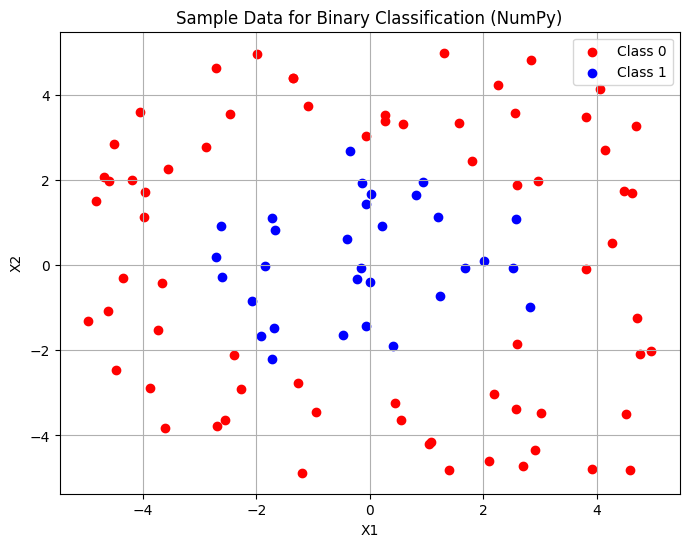

In [47]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# 生成範例資料 (使用 NumPy)
def generate_data_np(num_samples):
    data = []
    for i in range(num_samples):
        x = (random.uniform(-5, 5), random.uniform(-5, 5))
        distance_from_center = math.sqrt(x[0]**2 + x[1]**2)
        label = 1 if distance_from_center < 3 else 0
        data.append((np.array(x), label))
    return data

# 可視化資料 (使用 matplotlib)
def visualize_data_np(data):
    x_class0 = [d[0][0] for d in data if d[1] == 0]
    y_class0 = [d[0][1] for d in data if d[1] == 0]
    x_class1 = [d[0][0] for d in data if d[1] == 1]
    y_class1 = [d[0][1] for d in data if d[1] == 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(x_class0, y_class0, color='red', label='Class 0')
    plt.scatter(x_class1, y_class1, color='blue', label='Class 1')
    plt.title('Sample Data for Binary Classification (NumPy)')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()

# 生成 100 個樣本的資料 (使用 NumPy 格式)
sample_data_np = generate_data_np(100)

# 可視化資料
visualize_data_np(sample_data_np)

In [48]:
# 初始化 MLP 模型 (使用 NumPy)
def initialize_mlp_np(input_size, hidden_size, output_size):
    # 使用 NumPy 陣列初始化權重和偏差
    # 權重通常會以一個小的隨機值初始化
    # 偏差通常會初始化為 0
    weights_input_hidden = np.random.uniform(-0.5, 0.5, (input_size, hidden_size))
    bias_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.uniform(-0.5, 0.5, (hidden_size, output_size))
    bias_output = np.zeros((1, output_size))

    model = {
        'weights_input_hidden': weights_input_hidden,
        'bias_hidden': bias_hidden,
        'weights_hidden_output': weights_hidden_output,
        'bias_output': bias_output
    }
    return model

# 定義模型結構
input_size = 2
hidden_size = 4
output_size = 1

# 初始化模型
mlp_model_np = initialize_mlp_np(input_size, hidden_size, output_size)

print("MLP Model Initialized (NumPy):")
print("Input to Hidden Weights:\n", mlp_model_np['weights_input_hidden'])
print("Hidden Bias:\n", mlp_model_np['bias_hidden'])
print("Hidden to Output Weights:\n", mlp_model_np['weights_hidden_output'])
print("Output Bias:\n", mlp_model_np['bias_output'])

MLP Model Initialized (NumPy):
Input to Hidden Weights:
 [[ 0.31443503  0.36792585 -0.27289235  0.18898393]
 [-0.10348894 -0.05133959 -0.1881921   0.02272941]]
Hidden Bias:
 [[0. 0. 0. 0.]]
Hidden to Output Weights:
 [[ 0.21389506]
 [ 0.37386722]
 [-0.44785975]
 [ 0.16171656]]
Output Bias:
 [[0.]]


In [49]:
# 活化函數 (使用 NumPy)
def relu_np(x):
    return np.maximum(0, x)

def relu_derivative_np(x):
    return (x > 0).astype(float)

# Sigmoid 活化函數 (使用 NumPy)
def sigmoid_np(x):
    # 為了避免溢出，可以對輸入進行限制
    clipped_x = np.clip(x, -500, 500) # 限制 x 的範圍
    return 1 / (1 + np.exp(-clipped_x))

def sigmoid_derivative_np(x):
    s = sigmoid_np(x)
    return s * (1 - s)

# 損失函數 (使用 NumPy)
# 均方誤差損失函數 (Mean Squared Error with averaging)
def mean_squared_error_loss_np(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [50]:
# 前向傳播 (使用 NumPy)
def forward_pass_np(model, x):
    # 輸入層到隱藏層
    hidden_layer_input = np.dot(x, model['weights_input_hidden']) + model['bias_hidden']
    hidden_layer_output = relu_np(hidden_layer_input)

    # 隱藏層到輸出層 (使用 Sigmoid 活化函數)
    output_layer_input = np.dot(hidden_layer_output, model['weights_hidden_output']) + model['bias_output']
    output = sigmoid_np(output_layer_input) # 使用 Sigmoid 活化函數

    return hidden_layer_input, hidden_layer_output, output_layer_input, output

In [51]:
# 反向傳播 (使用 NumPy)
def backward_pass_np(model, x, y_true, hidden_layer_input, hidden_layer_output, output_layer_input, output):
    # 輸出層的誤差 (假設使用均方誤差損失)
    output_error = output - y_true # (y_pred - y_true)

    # 計算輸出層權重和偏差的梯度
    gradient_bias_output = output_error * sigmoid_derivative_np(output_layer_input)

    # 輸出層權重的梯度是隱藏層輸出轉置乘以 (輸出層誤差 * Sigmoid 導數)
    gradient_weights_hidden_output = np.dot(hidden_layer_output.T, gradient_bias_output)

    # 計算隱藏層的誤差
    hidden_layer_error = np.dot(gradient_bias_output, model['weights_hidden_output'].T) * relu_derivative_np(hidden_layer_input)

    # 計算隱藏層權重和偏差的梯度
    gradient_bias_hidden = hidden_layer_error

    # 隱藏層權重的梯度是輸入轉置乘以隱藏層誤差
    gradient_weights_input_hidden = np.dot(x.T, hidden_layer_error)

    gradients = {
        'weights_input_hidden': gradient_weights_input_hidden,
        'bias_hidden': gradient_bias_hidden,
        'weights_hidden_output': gradient_weights_hidden_output,
        'bias_output': gradient_bias_output
    }
    return gradients

Epoch 100, Loss: 0.0325
Epoch 200, Loss: 0.0251
Epoch 300, Loss: 0.0219
Epoch 400, Loss: 0.0200
Epoch 500, Loss: 0.0187
Epoch 600, Loss: 0.0178
Epoch 700, Loss: 0.0171
Epoch 800, Loss: 0.0166
Epoch 900, Loss: 0.0161
Epoch 1000, Loss: 0.0158

Training Accuracy (NumPy): 0.9900


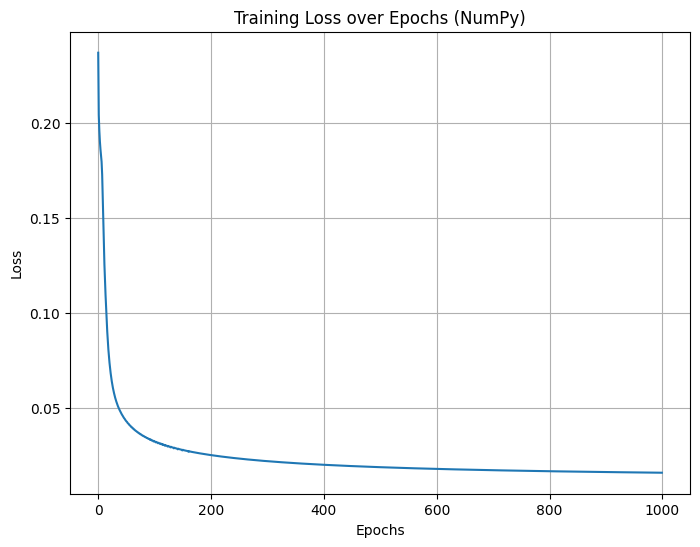

In [52]:
# 更新權重和偏差 (使用 NumPy)
def update_weights_np(model, gradients, learning_rate):
    model['weights_input_hidden'] -= learning_rate * gradients['weights_input_hidden']
    model['bias_hidden'] -= learning_rate * gradients['bias_hidden']
    model['weights_hidden_output'] -= learning_rate * gradients['weights_hidden_output']
    model['bias_output'] -= learning_rate * gradients['bias_output']
    return model

# 訓練模型 (使用 NumPy)
def train_mlp_np(model, data, learning_rate, epochs):
    losses = []
    for epoch in range(epochs):
        total_loss = 0
        for x, y_true in data:
            # 將 y_true 轉換為 NumPy 陣列，並確保形狀正確
            y_true_np = np.array([[y_true]]) # 確保是 (1, 1) 的形狀

            # 前向傳播
            hidden_layer_input, hidden_layer_output, output_layer_input, output = forward_pass_np(model, x.reshape(1, -1)) # 將輸入轉換為 (1, input_size) 的形狀

            # 計算損失
            loss = mean_squared_error_loss_np(y_true_np, output)
            total_loss += loss

            # 反向傳播
            gradients = backward_pass_np(model, x.reshape(1, -1), y_true_np, hidden_layer_input, hidden_layer_output, output_layer_input, output)

            # 更新權重
            model = update_weights_np(model, gradients, learning_rate)

        # 計算平均損失
        average_loss = total_loss / len(data)
        losses.append(average_loss)

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}, Loss: {average_loss:.4f}")

    return model, losses

# 評估模型 (簡單的分類準確率，使用 NumPy)
def evaluate_mlp_np(model, data):
    correct_predictions = 0
    for x, y_true in data:
        # 前向傳播並獲取輸出
        _, _, _, output = forward_pass_np(model, x.reshape(1, -1))
        # 對於 Sigmoid 輸出，設定閾值 0.5 來進行分類
        predicted_class = 1 if output[0][0] > 0.5 else 0 # output 是 (1, 1) 的 NumPy 陣列

        if predicted_class == y_true:
            correct_predictions += 1

    accuracy = correct_predictions / len(data)
    return accuracy

# 設定訓練參數
learning_rate = 0.1 # 可以先嘗試一個較小的學習率
epochs = 1000

# 訓練模型
trained_model_np, training_losses_np = train_mlp_np(mlp_model_np, sample_data_np, learning_rate, epochs)

# 評估模型
accuracy_np = evaluate_mlp_np(trained_model_np, sample_data_np)
print(f"\nTraining Accuracy (NumPy): {accuracy_np:.4f}")

# 可視化損失變化
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), training_losses_np)
plt.title('Training Loss over Epochs (NumPy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

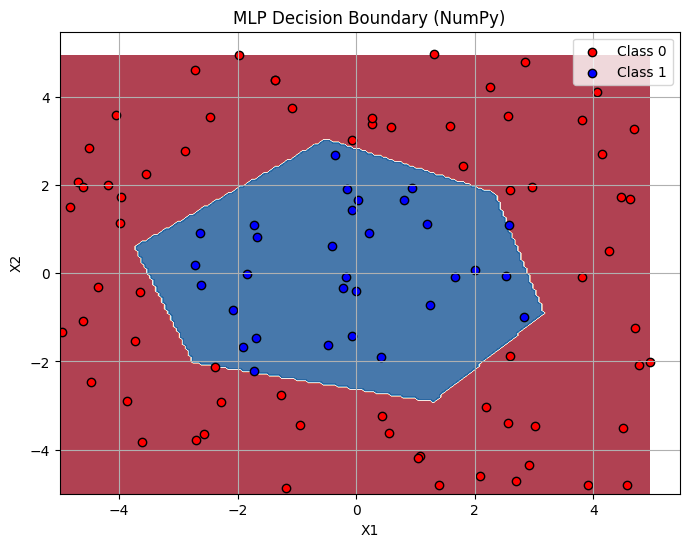

In [53]:
# 可視化決策邊界 (使用 NumPy)
def visualize_decision_boundary_np(model, data, ax):
    x_min, x_max = -5, 5
    y_min, y_max = -5, 5
    h = .05  # 網格步長

    # 生成網格點
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 對網格點進行預測
    Z = []
    for i in range(xx.shape[0]):
        row_predictions = []
        for j in range(xx.shape[1]):
            # 將網格點轉換為模型輸入格式 (1, input_size)
            input_point = np.array([[xx[i, j], yy[i, j]]])
            # 進行前向傳播並獲取輸出
            _, _, _, output = forward_pass_np(model, input_point)
            # 根據輸出設定閾值進行分類
            predicted_class = 1 if output[0][0] > 0.5 else 0
            row_predictions.append(predicted_class)
        Z.append(row_predictions)
    Z = np.array(Z)

    # 繪製等高線圖來顯示決策邊界
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)

    # 繪製原始資料點
    x_class0 = [d[0][0] for d in data if d[1] == 0]
    y_class0 = [d[0][1] for d in data if d[1] == 0]
    x_class1 = [d[0][0] for d in data if d[1] == 1]
    y_class1 = [d[0][1] for d in data if d[1] == 1]

    ax.scatter(x_class0, y_class0, color='red', label='Class 0', edgecolors='k')
    ax.scatter(x_class1, y_class1, color='blue', label='Class 1', edgecolors='k')

    ax.set_title('MLP Decision Boundary (NumPy)')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()
    ax.grid(True)


# 創建一個圖形和子圖
fig, ax = plt.subplots(figsize=(8, 6))

# 可視化決策邊界和資料點
visualize_decision_boundary_np(trained_model_np, sample_data_np, ax)

plt.show()